In [ ]:
# Arman Hussain
# Full Time
# Friday 27th March 2020
# Dave Baker 

In [73]:
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import sys

# Data Cleaning

In [74]:
df = pd.read_csv('kc_house_data.csv')

In [75]:
#We are dropping the columns that are not needed as specified below

df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement',
                 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [76]:
#This displays the first 5 rows

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [77]:
#This displays the bottom 5 rows

df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004
21596,1523300157,325000.0,2,0.75,1020,1076,2.0,0.0,3,7,2008


In [78]:
#This cell looks for the number of rows and columns after getting rid of the unwanted columns 

df.shape

(21597, 11)

In [79]:
#This cell summarizes the descriptive statistics including the central tendency, dispersion, and shape of the df

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [80]:
#Looking for which column has missing values

df.isna().any()

id             False
price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
floors         False
waterfront      True
condition      False
grade          False
yr_built       False
dtype: bool

In [81]:
#Looking for how many missing values

df['waterfront'].isna().sum()

2376

In [82]:
#Dropping all the missing values in the waterfront column

df.dropna(subset=['waterfront'], inplace=True)

In [83]:
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [84]:
#Checking to see the number of rows after the missing values were dropped

df.shape

(19221, 11)

In [85]:
#We are inspecting the number the number of duplicate rows
DuplicatesInDf = df[df.duplicated()]
print("Number of Duplicates in DataFrame:", DuplicatesInDf.shape)

Number of Duplicates in DataFrame: (2, 11)


In [86]:
#We can see that there are only 2 rows of duplicates. We can drop these

df = df.drop_duplicates()

In [87]:
#This indicates the number of rows after dropping the duplicates

df.count()

id             19219
price          19219
bedrooms       19219
bathrooms      19219
sqft_living    19219
sqft_lot       19219
floors         19219
waterfront     19219
condition      19219
grade          19219
yr_built       19219
dtype: int64

In [88]:
#Visually inspecting the dataframe after dropping the duplicates rows and missing values

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001


In [89]:
#Checking if there are any strings present in the dataframe which would req conversion to integers before plotting

df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [90]:
#Now to detect the outliers by using box plots. Box plots are useful in EDA to show the general shape, central values,
#and variability using and interval scale. They also provide a general indication of the data skewness. 


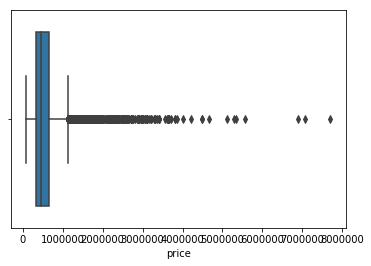

In [91]:
#Box plot of price

sns.boxplot(x=df['price'])

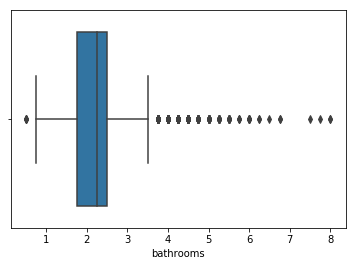

In [92]:
#Boxplot of bathrooms

sns.boxplot(x=df['bathrooms'])

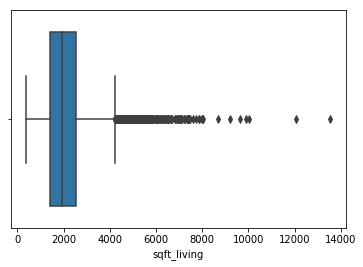

In [93]:
#Boxplot of sqft_living

sns.boxplot(x=df['sqft_living'])

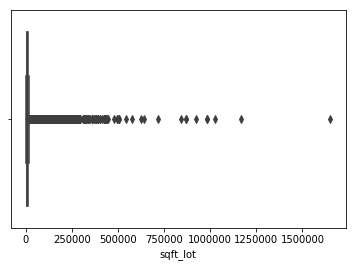

In [94]:
#Boxplot of sqft_lot

sns.boxplot(x=df['sqft_lot'])

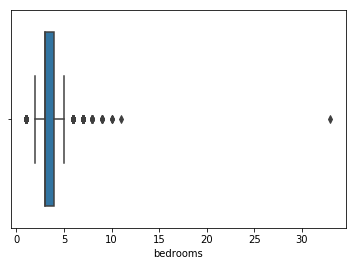

In [95]:
#Boxplot of bedrooms

sns.boxplot(x=df['bedrooms'])

In [96]:
# The following method will help us reduce our outliers

In [97]:
# Time to find the Interquarter range using 25% and 75% of the data to remove the outliers
Quarter1 = df.quantile(0.25)
Quarter3 = df.quantile(0.75)
InterQuartileRange = Quarter3 - Quarter1
print(InterQuartileRange)

id             5.210452e+09
price          3.222500e+05
bedrooms       1.000000e+00
bathrooms      7.500000e-01
sqft_living    1.120000e+03
sqft_lot       5.676500e+03
floors         1.000000e+00
waterfront     0.000000e+00
condition      1.000000e+00
grade          1.000000e+00
yr_built       4.600000e+01
dtype: float64


In [98]:
#After calculating the removal of the outliers we will print the data

df = df[~((df < (Quarter1-1.5 * InterQuartileRange)) | (df > (Quarter3 + 1.5 * InterQuartileRange))).any(axis=1)]
df.shape

(15097, 11)

In [27]:
#We can deduce that there were 4122 rows of outliers which have been removed from the dataset

# Data Visualization and EDA

# Business Questions 

1 - How is the price of the property affected by the other variables such as bedrooms, bathrooms, sqft_living, grade, and sqft_lot?

2 - What is the relationship between the number of bedrooms and price of property? 

3 - How does the year of the property built effect the price of the property?


# Scatter Plots

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


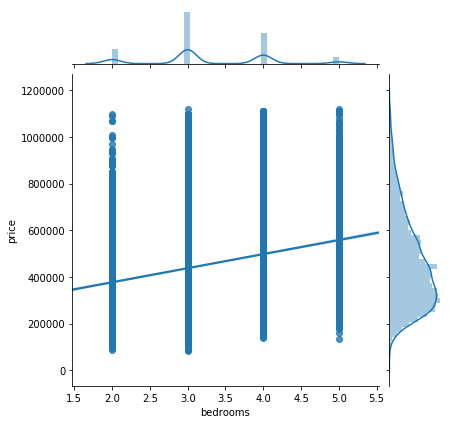

In [108]:
#Using single variables to plot our data using the Seaborn library to plot scatter graphs with marginal histograms
#Build a scatter plot showing price against bedrooms

sns.jointplot(x = 'bedrooms', y = 'price', data = df, kind = 'reg')

In [109]:
#There is very marginal linearity between the number of bedrooms and the price of the home. 

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


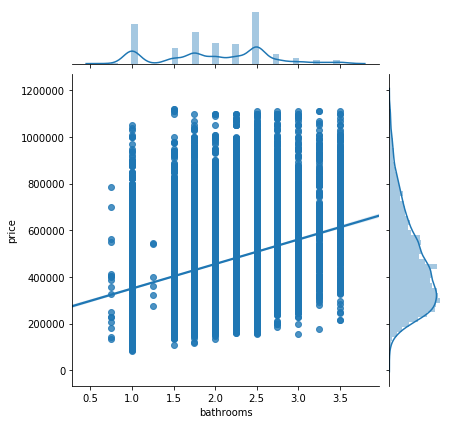

In [31]:
#Build a scatter plot showing price against bathrooms

sns.jointplot(x = 'bathrooms', y = 'price', data = df, kind = 'reg') 

In [110]:
#There is very marginal linearity between the number of bathrooms in a home and the price

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


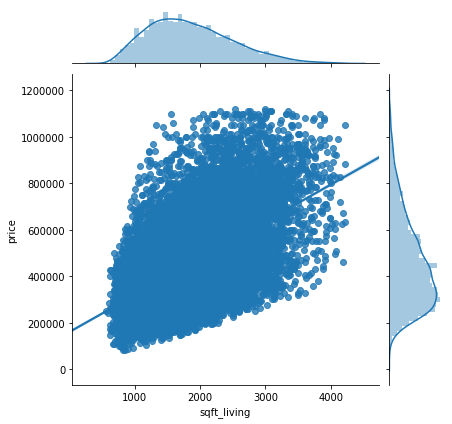

In [33]:
#Build a scatter plot displaying price against sqft_living

sns.jointplot(x = 'sqft_living', y = 'price', data = df, kind = 'reg')

In [111]:
#The sqft_living of home has shown to exhibit a linear relationship with the price

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


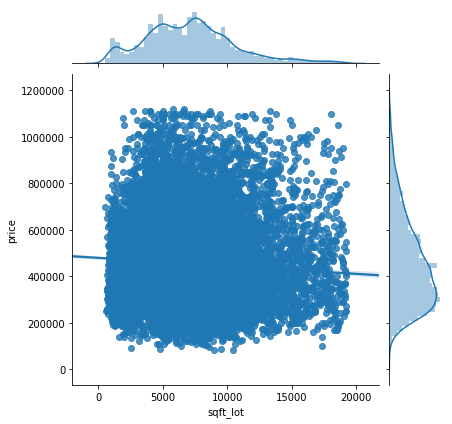

In [35]:
sns.jointplot(x = 'sqft_lot', y = 'price', data = df, kind = 'reg')

In [112]:
#We are seeing little to no linearity between the price of a home and sqft of the lot. This could be disused in the future

In [113]:
#Produce a correlation matrix with the variables that will be useful to find multicollinearity in the next step

feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'yr_built']
correlation = df[feats].corr()
correlation

#Producing this matrix allows us to select our features for multicollinearity. A good result is one where the R-squared
#is above 0.65. This thereby suggests almost certain multicollinearity.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built
price,1.000000,0.247331,0.359171,0.536569,-0.062794,0.543267,-0.044854
bedrooms,0.247331,1.000000,0.459994,0.614493,0.199210,0.303108,0.157331
bathrooms,0.359171,0.459994,1.000000,0.674117,-0.058791,0.582099,0.556528
sqft_living,0.536569,0.614493,0.674117,1.000000,0.183729,0.627377,0.314047
sqft_lot,-0.062794,0.199210,-0.058791,0.183729,1.000000,-0.001525,-0.070707
grade,0.543267,0.303108,0.582099,0.627377,-0.001525,1.000000,0.471243
yr_built,-0.044854,0.157331,0.556528,0.314047,-0.070707,0.471243,1.000000


# Heat Map

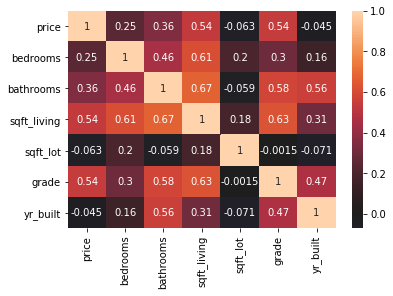

In [114]:
#A heatmap is a good visual method of identifying what correlation features you want to use to produce the Models 

sns.heatmap(correlation, center = 0, annot = True )

Using this heatmap we can see that price has a strong positive correlation with the sqft_living area of the space and
there are also good linear correlation relationships between the price and the number of bathrooms and bedrooms.
A strong correlation is also indicated between the bathrooms and floors is also noticeable. There by suggesting that more floors are in houses with a greater number of bathrooms. 

# Models

Question 1 - How is the price of the property affected by the other variables such as bedrooms, bathrooms, sqft_living, grade, and sqft_lot?

In [44]:
#We are going to produce our baseline model here to answer the 1st business question

In [188]:
X = df.drop(['price'], axis=1)
X = X.drop(['id', 'floors', 'condition', 'yr_built'], axis=1)
y = df['price']

In [189]:
#The test size tells us the proportion of the dataset we are using in the test split 
#Random state is the seed used by the random number generator

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [190]:
X_cte_train = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train,X_train)
results = baseline_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:26:37   Log-Likelihood:            -1.2881e+05
No. Observations:                9661   AIC:                         2.576e+05
Df Residuals:                    9654   BIC:                         2.577e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms            2189.9987   2194.231      0.998      0.318   -2111.154    6491.152
bathrooms           -1.92e+04   2570.667     -7.467      0.000   -2.42e+04   -1.42e+04
sqft_living          253.8077      7.855     32.314      0.000     238.411     269.204
sqft_lot              -9.2313      0.530    -17.404      0.000     -10.271      -8.192
waterfront         -1.199e-12   5.76e-13     -2.083      0.037   -2.33e-12   -7.08e-14
grade               7.958e+04   2438.017     32.643      0.000    7.48e+04    8.44e+04
rooms              -1.701e+04   1344.248    -12.651      0.000   -1.96e+04   -1.44e+04
square_foot_living -9600.7794    778.076    -12.339      0.000   -1.11e+04   -8075.586
time_since_1960     -491.3778    114.037     -4.309      0.000    -714.914    -267.841
==============================================================================
Omnibus:                      628.267   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.359
Skew:                           0.626   Prob(JB):                    1.30e-170
Kurtosis:                       3.612   Cond. No.                     1.56e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [191]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.38314287712853123

# Question 1 Answer

Based on all the factors in the baseline model, we have been able to see an overfit of our data meaning all the essential and non-essential factors to what a person would look for in a house (such as no. of beds/baths/sqft lot size/if the property has a waterfront/grade/rooms/and sqft_living) causes an overfit in our data with some variables showing a linear positive relationship, and others showing a negative correlation. This will be further investigated by refining the model

Question 2 - What is the relationship between the number of bedrooms and price of property?

In [192]:
#We are checking to see the multicollinearity by only using the variables we think will benefit us 

#First we will separate by UNSTANDARDISED and STANDARDISED coefficients

df_modelA = df[['bedrooms', 'sqft_living', 'grade']]

#Now we will calculate z-scores of our chosen variables. Z scores tell us how far we are from the mean data point
df_modelA['z_bedrooms'] = stats.zscore(df_modelA['bedrooms'])
df_modelA['z_sqft_living'] = stats.zscore(df_modelA['sqft_living'])
df_modelA['z_grade'] = stats.zscore(df_modelA['grade'])

#We are going to separate our STANDARDIZED AND UNSTANDARDIZED coefficients
df_unstandardized = df_modelA[['bedrooms', 'sqft_living', 'grade']] 
df_standardized = df_modelA[['z_bedrooms', 'z_sqft_living', 'z_grade']] 



/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [193]:
print("The average bedrooms is: ", df_unstandardized['bedrooms'].mean())
print("The average sqft living is: ", df_unstandardized['sqft_living'].mean())
print("The average grade is: ", df_unstandardized['grade'].mean())

The average bedrooms is:  3.2822720874389337
The average sqft living is:  1856.7797466258178
The average grade is:  7.411691645276145


In [194]:
print("The average bedrooms as a z score is: ", round(df_standardized['z_bedrooms'].mean()))
print("The average sqft living as a z score is: ", round(df_standardized['z_sqft_living'].mean()))
print("The average grade as a z score is: ", round(df_standardized['z_grade'].mean()))

The average bedrooms as a z score is:  -0.0
The average sqft living as a z score is:  -0.0
The average grade as a z score is:  0.0


In [195]:
df_unstandardized.head()

,bedrooms,sqft_living,grade
3610,4,3140,9
9322,4,1670,8
16609,4,2760,8
435,4,1710,9
15194,3,970,7


In [212]:
#A negative value indicated below average and a positive value indicates above average

df_standardized.head()

,z_bedrooms,z_sqft_living,z_grade
3610,0.916858,1.996665,1.958238
9322,0.916858,-0.290626,0.725330
16609,0.916858,1.405393,0.725330
435,0.916858,-0.228386,1.958238
15194,-0.360587,-1.379811,-0.507578


In [197]:
df_unstandardized.head()

,bedrooms,sqft_living,grade
3610,4,3140,9
9322,4,1670,8
16609,4,2760,8
435,4,1710,9
15194,3,970,7


In [198]:
df_unstandardized.head()

print(df['price'].shape, df_unstandardized.shape)

(12077,) (12077, 3)


In [60]:
X_unstandardized = sm.add_constant(df_unstandardized)
model_unstandardized = sm.OLS(df['price'], X_unstandardized)
results_unstandardized = model_unstandardized.fit()

results_unstandardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2869.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:42:46   Log-Likelihood:            -2.0158e+05
No. Observations:               15097   AIC:                         4.032e+05
Df Residuals:                   15093   BIC:                         4.032e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.56e+05   1.33e+04    -19.182      0.000   -2.82e+05    -2.3e+05
bedrooms    -2.171e+04   2030.685    -10.693      0.000   -2.57e+04   -1.77e+04
sqft_living   113.8904      3.008     37.860      0.000     107.994     119.787
grade        7.693e+04   1970.114     39.047      0.000    7.31e+04    8.08e+04
==============================================================================
Omnibus:                      970.830   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.073
Skew:                           0.643   Prob(JB):                    9.28e-257
Kurtosis:                       3.467   Cond. No.                     2.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
#We are now going to further investigate the parameters under the coefficient


results_unstandardized.params

const         -254476.884621
bedrooms       -23567.213239
sqft_living       116.589471
grade           76835.696146
dtype: float64

In our **unstandardised** the coefs are:

$price = -23567 * \beta_{bedrooms} + 116 * \beta_{sqftliving} + 76835 * \beta_{grade} - 254,476.88$

This can be interpreted as for every bedroom that is added, you can expect price to DROP by -$23,567, all other factors (square foot living) held equal.

In [183]:
results_unstandardized.params[2]/results_unstandardized.params[1]

-0.004947104693285209

In [200]:
X_standardized = sm.add_constant(df_standardized)
model_standardized = sm.OLS(z_target, X_standardized)
results_standardized = model_standardized.fit()

results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2294.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:26:57   Log-Likelihood:                -14413.
No. Observations:               12077   AIC:                         2.883e+04
Df Residuals:                   12073   BIC:                         2.886e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.012e-18      0.007   5.52e-16      1.000      -0.014       0.014
z_bedrooms       -0.0966      0.009    -10.402      0.000      -0.115      -0.078
z_sqft_living     0.3923      0.011     34.725      0.000       0.370       0.414
z_grade           0.3263      0.009     34.934      0.000       0.308       0.345
==============================================================================
Omnibus:                      795.701   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.865
Skew:                           0.653   Prob(JB):                    2.49e-211
Kurtosis:                       3.473   Cond. No.                         2.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In our **standardised** the coefs are:

$price = -0.0966 * \beta_{z_bedrooms} + 0.03923 * \beta_{z_sqft_living} + 0.3263 * \beta_{z_grade} + 4.012x10^-18

This can be interpreted as for every bedroom that is added, you can expect price to DROP by -0.0966, given that all other factors (square foot living) held equal.

We can also notice that our z_bedrooms and z_sqft_living are much smaller here. In comparison to the unstandardized models, we can deduce that grade and sqft_living are more impactful parameters than the number of bedrooms

In [184]:
#We are now going to further investigate the parameters under the coefficient


results_standardized.params

const           -7.632783e-17
z_bedrooms      -8.884981e-02
z_sqft_living    3.849576e-01
z_grade          3.286849e-01
dtype: float64

In [201]:
results_standardized.params[2]/results_standardized.params[1]

-4.06152610773099

In [206]:
#Now we are going to standardize everything 

z_target = stats.zscore(df['price'])

X_standardized_all = sm.add_constant(df_standardized)
model_unstandardized_all = sm.OLS(z_target,X_standardized)
results_standardized_all = model_standardized_all.fit()

results_standardized_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2869.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:27:35   Log-Likelihood:                -18016.
No. Observations:               15097   AIC:                         3.604e+04
Df Residuals:                   15093   BIC:                         3.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.633e-17      0.006  -1.18e-14      1.000      -0.013       0.013
z_bedrooms       -0.0888      0.008    -10.693      0.000      -0.105      -0.073
z_sqft_living     0.3850      0.010     37.860      0.000       0.365       0.405
z_grade           0.3287      0.008     39.047      0.000       0.312       0.345
==============================================================================
Omnibus:                      970.830   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.073
Skew:                           0.643   Prob(JB):                    9.28e-257
Kurtosis:                       3.467   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 2 Answer

Lastly,

$price = -0.0888 * \beta_{bedrooms} + 0.3850 * \beta_{sqftliving} + 0.3287 * \beta_{z_grade}$

This can be understood as for every INCREASE of one standard deviation (or one z) that is added to bedrooms, you can expect price to DECREASE by -$0.0888 standard deviations, provided that all other factors (square foot living) held equal.

Similarly here, we can notice that the z_bedroom coefficient is much smaller than square foot living again as above. This thereby shows that the number of bedrooms does not have a good linear relationship with the increase in price. 



In [202]:
round(results_standardized_all.params[0])

-0.0

# Homoscedasticity

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


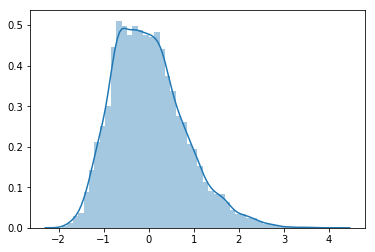

In [203]:
sns.distplot(results_standardized_all.resid)

In [209]:
results_standardized_all.df_resid

sns.regplot(results_standardized_all.resid, z_target)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 15097 and the array at index 1 has size 12077

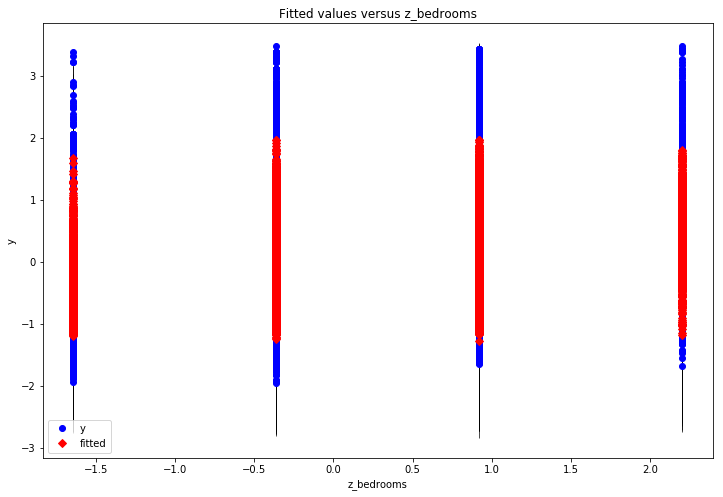

In [146]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_fit(results_standardized_all, "z_bedrooms", ax=ax)

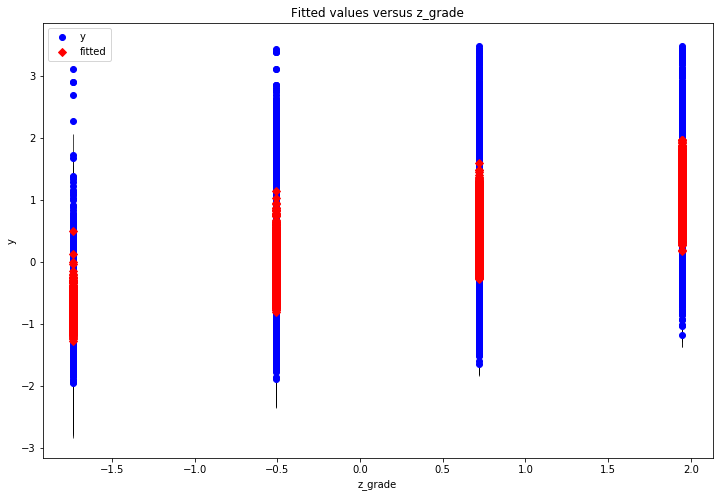

In [147]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_fit(results_standardized_all, "z_grade", ax=ax)

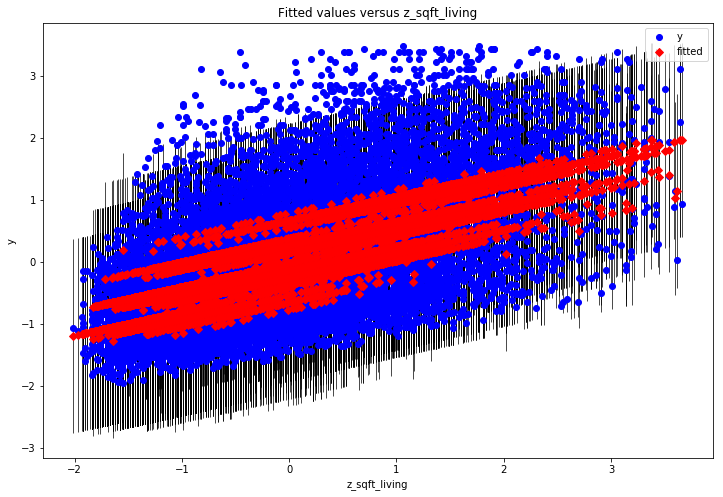

In [148]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_fit(results_standardized_all, "z_sqft_living", ax=ax)

Question 3 - How does the year of the property built effect the price of the property?

# Analysing Change in Price using 'yr_built'

In [149]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995


In [210]:
#We will combine our variables and this time we will incorporate the year to build an assumption that
#newer built properties among more bedrooms and bathrooms will lead to an increase in price

df['rooms'] = df['bedrooms'] + df['bathrooms']

df['square_foot_living'] = np.sqrt(df['sqft_living'])

Build_1 = df.groupby('yr_built').mean()
Build_2 = Build_1['price']

Build_3 = pd.DataFrame(Build_2)
Build_3['year'] = Build_3.index

#Evaluate data from 1960

df['time_since_1960'] = abs(df['yr_built'] - 1960)

final_features = df[['time_since_1960', 'square_foot_living']]


/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


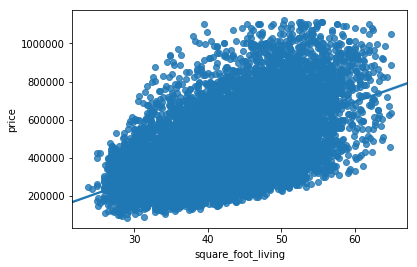

In [211]:
sns.regplot(df['square_foot_living'], df['price'])

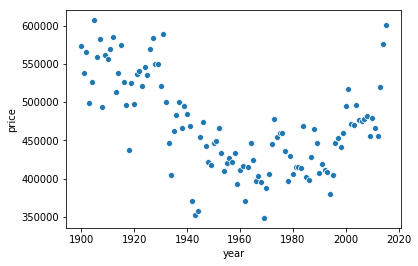

In [153]:
sns.scatterplot(Build_3['year'], Build_3['price'])

# Question 3 Answer 

Based on the figure produced above of price v year built, we can see an increase in price from the year 1960, thus we further refined our model using the year from 1960 and sqft_living parameters to give us better indication of how these correlate with the price. From the results below, we can see that sqft_living  and time_since_1960 go up with the price. 

In [155]:
X_final = sm.add_constant(final_features)
model_final = sm.OLS(df['price'], X_final)
results_final = model_final.fit()

results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     3112.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        01:34:06   Log-Likelihood:            -2.0238e+05
No. Observations:               15097   AIC:                         4.048e+05
Df Residuals:                   15094   BIC:                         4.048e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.327e+05   7603.421    -17.453      0.000   -1.48e+05   -1.18e+05
time_since_1960     1151.4350     77.711     14.817      0.000     999.112    1303.758
square_foot_living  1.312e+04    179.218     73.219      0.000    1.28e+04    1.35e+04
==============================================================================
Omnibus:                      900.031   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1067.236
Skew:                           0.636   Prob(JB):                    1.79e-232
Kurtosis:                       3.278   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To interpret the coefficients,  for every increase in year since 1960 the price of the property and square_foot_living goes up by $1151.4350  or  $ 13120 respectively. Assuming either or remain constant

$price = 1151.44 * \beta_{time_since_1960} + 13120 * \beta_{square_foot_living} - 132,700$



# Final Test

I tried to produce thiss but realised I should have put my train, test data at the top

In [162]:
# target = df['price']

In [163]:
# df, df_test, target, target_test = train_test_split(df,target, test_size=.2, random_state= 42)

In [166]:
# df_test['square_foot_living'] = np.sqrt(df_test['sqft_living'])

# df_test['time_since_1960'] = abs(df['yr_built'] - 1960)

# final_feats_test = df_test[['time_since_1960', 'square_foot_living']]

In [169]:
# X_final_test = sm.add_constant(final_feats_test)
# model_final_test = sm.OLS(target_test, X_final_test)
# results_final_test = model_final_test.fit()

# results_final_test.summary()

MissingDataError: exog contains inf or nans